<a href="https://colab.research.google.com/github/SergiQa/squid-game-sentiment-analysis/blob/main/squid_games_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de sentimiento del Juego del Calamar usando Python

El conjunto de datos que estoy usando para la tarea de análisis de sentimientos de Squid Game se descarga de Kaggle, que inicialmente se recopiló de Twitter mientras las personas compartían activamente sus opiniones sobre Squid Game. Comencemos la tarea de análisis de sentimientos de Squid Game importando las bibliotecas de Python necesarias y el conjunto de datos:

Dataset: https://www.kaggle.com/deepcontractor/squid-game-netflix-twitter-data/download


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("tweets_v8.csv")
print(data.head())

                    user_name  user_location  \
0   the _ûndër-ratèd niggáh👊🏾            NaN   
1  Best uncle on planet earth            NaN   
2                      marcie            NaN   
3                    YoMo.Mdp  Any pronouns    
4             Laura Reactions         France   

                                    user_description  \
0  @ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...   
1                                                NaN   
2  animal crossing. chicken nuggets. baby yoda. s...   
3  Where the heck is the karma\nI'm going on my s...   
4  I talk and I make reactions videos about shows...   

                user_created  user_followers  user_friends  user_favourites  \
0  2019-09-06 19:24:57+00:00             581          1035             8922   
1  2013-05-08 19:35:26+00:00             741           730             8432   
2  2009-02-21 10:31:30+00:00             562          1197            62732   
3  2021-02-14 13:21:22+00:00               3           277

En las primeras impresiones de este conjunto de datos, noté valores nulos en la columna "user_location" que parecen no afectar la tarea de análisis de sentimiento. Así que se eliminará esta columna:

In [7]:
data = data.drop(columns="user_location", axis=1)

Ahora echemos un vistazo a si otras columnas contienen valores nulos o no:

In [16]:
print(data.isnull().sum())

user_name              4
user_description    3913
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
source                 1
is_retweet             1
dtype: int64


La columna "user_description" también contiene valores nulos, que tampoco afectarán la tarea de análisis de sentimiento. Así que voy a eliminar esta columna también:

In [17]:
data = data.drop(columns="user_description", axis=1)
data = data.dropna()

La columna de "text" en el conjunto de datos contiene las opiniones de los usuarios de Twitter sobre el juego del calamar, ya que estas son opiniones de las redes sociales, por lo que esta columna debe prepararse antes de cualquier análisis. Así que preparemos esta columna para la tarea de análisis de sentimientos:

In [21]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Ahora echemos un vistazo a las palabras más utilizadas en las opiniones de Squid Game usando una nube de palabras. Una nube de palabras es una herramienta de visualización de datos que muestra las palabras más utilizadas en un tamaño más grande. Así es como puede visualizar la nube de palabras de la columna de texto:

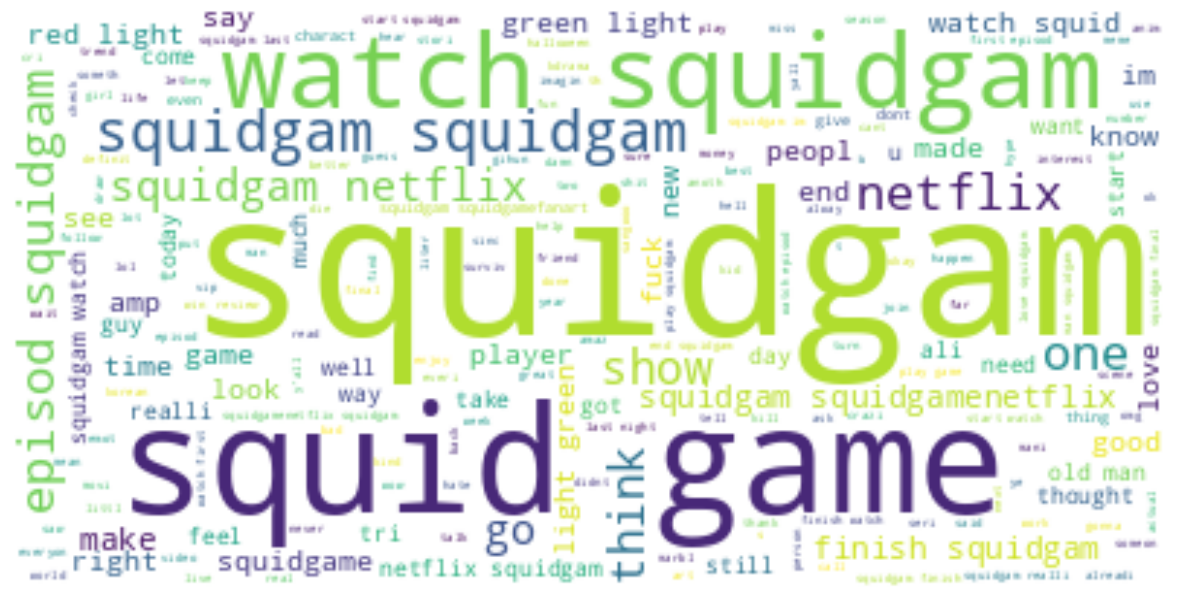

In [22]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ahora pasemos a la tarea del análisis de sentimientos de Squid Game. Aquí agregaré tres columnas más en este conjunto de datos como Positivo, Negativo y Neutral al calcular los puntajes de sentimiento de la columna de texto:

In [23]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                text  Positive  Negative  \
0  life hit time poverti strike yougong yoo  let ...     0.173     0.108   
1                    marbl episod squidgam  ruin 😭😭😭     0.000     0.487   
2                                      squidgam time     0.000     0.000   
3  blood  slideim join squidgam thing im alreadi ...     0.142     0.277   
4  two first game player kill mask guy  bloodi ni...     0.000     0.461   

   Neutral  
0    0.719  
1    0.513  
2    1.000  
3    0.581  
4    0.539  


Ahora calculemos cómo piensa la mayoría de la gente sobre el juego del calamar:


In [24]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


Entonces, la mayoría de las opiniones de los usuarios son neutrales, ahora echemos un vistazo al total de cada puntaje de sentimiento antes de llegar a una conclusión:

In [25]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  7986.892999999995
Negative:  4293.024000000009
Neutral:  49326.09400000198


El total de negativos es muy inferior al de Positivos, por lo que podemos decir que la mayoría de las opiniones sobre Squid Game son positivas.

## Resumen
The Squid Game es actualmente uno de los programas más populares en Netflix. Una de las razones detrás de esto son las reseñas y opiniones de los espectadores en las redes sociales.